In [1]:
# Import standard libraries
import os
from contextlib import redirect_stdout

import sys
# append coeqwal packages to path
sys.path.append('./coeqwalpackage')

import numpy as np
import pandas as pd
import datetime as dt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import custom libraries
# Note: on my computer the next import doesn't work the first time I call it, why? If I re-run the cell, then it is ok. MUST DEBUG
from coeqwalpackage.metrics import *
import cqwlutils as cu
import plotting as pu

## Define contol file name

In [3]:
CtrlFile = 'CalSim3DataExtractionInitFile_v4.xlsx'
CtrlTab = 'Init'

## Read from control file

In [4]:
ScenarioListFile, ScenarioListTab, ScenarioListPath, DVDssNamesOutPath, SVDssNamesOutPath, ScenarioIndicesOutPath, DssDirsOutPath, VarListPath, VarListFile, VarListTab, VarOutPath, DataOutPath, ConvertDataOutPath, ExtractionSubPath, DemandDeliverySubPath, ModelSubPath, GroupDataDirPath, ScenarioDir, DVDssMin, DVDssMax, SVDssMin, SVDssMax, NameMin, NameMax, DirMin, DirMax, IndexMin, IndexMax, StartMin, StartMax, EndMin, EndMax, VarMin, VarMax, DemandFilePath, DemandFileName, DemandFileTab, DemMin, DemMax, InflowOutSubPath, InflowFilePath, InflowFileName, InflowFileTab, InflowMin, InflowMax = cu.read_init_file(CtrlFile, CtrlTab)

### Read in Data

In [5]:
df, dss_names = read_in_df(ConvertDataOutPath,DVDssNamesOutPath)

In [6]:
df = add_water_year_column(df)

C:\Dino\COEQWAL\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\metrics.py:175: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  return df_copy.drop(["Date", "Year", "Month"], axis=1)


### Get metrics paths and make directories if needed

In [7]:
metrics_path = GroupDataDirPath + "/metrics_output"
if not os.path.exists(metrics_path):
    os.makedirs(metrics_path)

## Metrics Examples

In [8]:
# To get a single metric and variable dataframe, type metrics[Month_{var}_{metric}] ie metrics['Apr_S_RESTOT_NOD_mnth_avg'], thresholds["S_SHSTA_frequency_hitting_level5"]
# Month = Apr, Sept... or None
# Metric = [ann_avg, mnth_avg, compute_iqr, ann_percentile, moy_avgs, mnth_percentile, annual_totals]

In [9]:
# Thresholds

variables = ["S_SHSTA_", "S_OROVL_", "S_TRNTY_", "S_SLUIS_CVP_", "S_SLUIS_SWP_"]
variables_level1 = ["S_SHSTALEVEL1DV", "S_OROVLLEVEL1DV", "S_TRNTYLEVEL1DV", "S_SLUIS_CVPLEVEL1DV", "S_SLUIS_SWPLEVEL1DV"]
variables_level5 = ["S_SHSTALEVEL5DV", "S_OROVLLEVEL5DV", "S_TRNTYLEVEL5DV", "S_SLUIS_CVPLEVEL5DV", "S_SLUIS_SWPLEVEL5DV"]
write_out_dfs = []

In [10]:
thresholds = {}

for var, var_lvl1, var_lvl5 in zip(variables, variables_level1, variables_level5):
    # LEVEL5DV calculation (LEVEL5DV - var < 0)
    exceedance_days, exceedance_days_fraction = frequency_hitting_level(df, dss_names, var, var_lvl5, "TAF", f"All_Prob_{var}flood")
    thresholds[f"{var}frequency_hitting_level5"] = (exceedance_days, exceedance_days_fraction)

    # LEVEL1DV calculation (var - LEVEL1DV < 0)
    exceedance_days, exceedance_days_fraction = frequency_hitting_level(df, dss_names, var_lvl1, var, "TAF", f"All_Prob_{var}dead")
    thresholds[f"{var}frequency_hitting_level1"] = (exceedance_days, exceedance_days_fraction)

    # September LEVEL1DV calculation
    exceedance_days, exceedance_days_fraction = frequency_hitting_level(df, dss_names, var_lvl1, var, "TAF", f"Sept_Prob_{var}dead", months=[9])
    thresholds[f"Sept_{var}frequency_hitting_level1"] = (exceedance_days, exceedance_days_fraction)

for threshold, (threshold_df, threshold_fraction) in thresholds.items():
    write_out_dfs.append(threshold_fraction)
    display(threshold_fraction)

All_Prob_S_SHSTA_flood
s0001                0.333333
s0002                0.315000
s0003                0.222500
s0004                0.192500
s0005                0.175833
s0006                0.303333
s0007                0.301667
s0008                0.300833
s0009                0.300833
s0010                0.301667
s0011                0.315833
s0012                0.330000
s0013                0.196667
s0014                0.205833
s0015                0.329167
s0016                0.208333
s0018                0.058333

All_Prob_S_SHSTA_dead
s0001               0.004167
s0002               0.017500
s0003               0.038333
s0004               0.052500
s0005               0.053333
s0006               0.003333
s0007               0.000000
s0008               0.000000
s0009               0.000000
s0010               0.000000
s0011               0.012500
s0012               0.018333
s0013               0.050833
s0014               0.045000
s0015               0.011667
s0016               0.030000
s0018               0.239167

Sept_Prob_S_SHSTA_dead
s0001                    0.01
s0002                    0.05
s0003                    0.10
s0004                    0.11
s0005                    0.11
s0006                    0.01
s0007                    0.00
s0008                    0.00
s0009                    0.00
s0010                    0.00
s0011                    0.04
s0012                    0.05
s0013                    0.11
s0014                    0.10
s0015                    0.03
s0016                    0.07
s0018                    0.45

All_Prob_S_OROVL_flood
s0001                0.215000
s0002                0.210000
s0003                0.165833
s0004                0.144167
s0005                0.133333
s0006                0.203333
s0007                0.201667
s0008                0.200000
s0009                0.201667
s0010                0.201667
s0011                0.210833
s0012                0.214167
s0013                0.146667
s0014                0.153333
s0015                0.215833
s0016                0.154167
s0018                0.109167

All_Prob_S_OROVL_dead
s0001               0.000000
s0002               0.000833
s0003               0.010000
s0004               0.016667
s0005               0.024167
s0006               0.000000
s0007               0.000000
s0008               0.000000
s0009               0.000000
s0010               0.000000
s0011               0.000833
s0012               0.000833
s0013               0.017500
s0014               0.015833
s0015               0.000000
s0016               0.006667
s0018               0.066667

Sept_Prob_S_OROVL_dead
s0001                    0.00
s0002                    0.00
s0003                    0.02
s0004                    0.04
s0005                    0.06
s0006                    0.00
s0007                    0.00
s0008                    0.00
s0009                    0.00
s0010                    0.00
s0011                    0.00
s0012                    0.00
s0013                    0.03
s0014                    0.03
s0015                    0.00
s0016                    0.02
s0018                    0.11

All_Prob_S_TRNTY_flood
s0001                0.000000
s0002                0.000833
s0003                0.000000
s0004                0.000000
s0005                0.000000
s0006                0.000000
s0007                0.000000
s0008                0.000000
s0009                0.000000
s0010                0.000000
s0011                0.000833
s0012                0.000833
s0013                0.000000
s0014                0.000000
s0015                0.000833
s0016                0.000000
s0018                0.000833

All_Prob_S_TRNTY_dead
s0001               0.000000
s0002               0.000000
s0003               0.000000
s0004               0.000000
s0005               0.000000
s0006               0.004167
s0007               0.000000
s0008               0.000833
s0009               0.000833
s0010               0.000833
s0011               0.000000
s0012               0.000000
s0013               0.000000
s0014               0.000000
s0015               0.000000
s0016               0.000000
s0018               0.012500

Sept_Prob_S_TRNTY_dead
s0001                    0.00
s0002                    0.00
s0003                    0.00
s0004                    0.00
s0005                    0.00
s0006                    0.02
s0007                    0.00
s0008                    0.01
s0009                    0.01
s0010                    0.01
s0011                    0.00
s0012                    0.00
s0013                    0.00
s0014                    0.00
s0015                    0.00
s0016                    0.00
s0018                    0.03

All_Prob_S_SLUIS_CVP_flood
s0001                    0.078333
s0002                    0.076667
s0003                    0.055000
s0004                    0.046667
s0005                    0.041667
s0006                    0.085000
s0007                    0.087500
s0008                    0.088333
s0009                    0.090833
s0010                    0.091667
s0011                    0.085833
s0012                    0.100000
s0013                    0.050000
s0014                    0.065833
s0015                    0.110000
s0016                    0.064167
s0018                    0.028333

All_Prob_S_SLUIS_CVP_dead
s0001                   0.015833
s0002                   0.027500
s0003                   0.057500
s0004                   0.085000
s0005                   0.102500
s0006                   0.017500
s0007                   0.015000
s0008                   0.017500
s0009                   0.017500
s0010                   0.017500
s0011                   0.025000
s0012                   0.012500
s0013                   0.078333
s0014                   0.044167
s0015                   0.006667
s0016                   0.040833
s0018                   0.195000

Sept_Prob_S_SLUIS_CVP_dead
s0001                        0.05
s0002                        0.08
s0003                        0.13
s0004                        0.21
s0005                        0.22
s0006                        0.00
s0007                        0.00
s0008                        0.00
s0009                        0.00
s0010                        0.00
s0011                        0.07
s0012                        0.03
s0013                        0.20
s0014                        0.13
s0015                        0.00
s0016                        0.09
s0018                        0.44

All_Prob_S_SLUIS_SWP_flood
s0001                    0.065833
s0002                    0.073333
s0003                    0.060000
s0004                    0.051667
s0005                    0.042500
s0006                    0.057500
s0007                    0.160000
s0008                    0.180000
s0009                    0.189167
s0010                    0.190000
s0011                    0.076667
s0012                    0.088333
s0013                    0.055000
s0014                    0.060833
s0015                    0.088333
s0016                    0.063333
s0018                    0.058333

All_Prob_S_SLUIS_SWP_dead
s0001                   0.029167
s0002                   0.026667
s0003                   0.027500
s0004                   0.055833
s0005                   0.043333
s0006                   0.040000
s0007                   0.030833
s0008                   0.033333
s0009                   0.033333
s0010                   0.033333
s0011                   0.025000
s0012                   0.025000
s0013                   0.033333
s0014                   0.025833
s0015                   0.021667
s0016                   0.025833
s0018                   0.035000

Sept_Prob_S_SLUIS_SWP_dead
s0001                        0.05
s0002                        0.05
s0003                        0.06
s0004                        0.13
s0005                        0.07
s0006                        0.06
s0007                        0.06
s0008                        0.05
s0009                        0.07
s0010                        0.07
s0011                        0.05
s0012                        0.04
s0013                        0.06
s0014                        0.04
s0015                        0.03
s0016                        0.04
s0018                        0.08

In [11]:
# Flow Requirements - only running scenario 18 (dss_names is messing it up, replace ["s0018"] with dss_names later)
# Missing C_SAC000_MIF_s0018

actual_flows = ["C_AMR004_s0018", "C_TRN111_s0018", "C_FTR029_s0018", "C_MOK028_s0018", "C_MCD005_s0018", "C_SAC257_s0018", "C_SJR127_s0018", "C_SAC289_s0018", "C_STS011_s0018",
                 "C_TUO003_s0018", "C_YUB002_s0018", "SP_SAC159_BTC003_s0018", "C_SAC148_s0018", "C_SAC122_s0018", "C_FTR003_s0018", "C_SAC049_s0018", "C_SJR070_s0018"
]
min_flows = ["C_AMR004_MIF_s0018", "C_TRN111_MIF_s0018", "C_FTR029_MIF_s0018", "C_MOK028_MIF_s0018", "C_MCD005_MIF_s0018", "C_SAC257_MIF_s0018", "C_SJR127_MIF_s0018", "C_SAC289_MIF_s0018", "C_STS011_MIF_s0018",
             "C_TUO003_MIF_s0018", "C_YUB002_MIF_s0018", "SP_SAC159_BTC003_MIF_s0018", "C_SAC148_MIF_s0018", "C_SAC122_MIF_s0018", "C_FTR003_MIF_s0018", "C_SAC049_MIF_s0018", "C_SJR070_MIF_s0018"
]


In [12]:
min_flows = [
    "C_AMR004", "C_TRN111", "C_FTR029", "C_MOK028", "C_MCD005",
    "C_SAC257", "C_SJR127", "C_SAC289", "C_STS011", "C_TUO003",
    "C_YUB002", "SP_SAC159_BTC003", "C_SAC148", "C_SAC122",
    "C_FTR003", "C_SAC049", "C_SJR070"
]

prob_result_list = []

for scenario in dss_names:
    scenario_short = scenario[:5]
    row_data = {"Scenario": scenario_short}

    for base_flow in min_flows:
        var1_name = f"{base_flow}_{scenario_short}"
        var2_name = f"{base_flow}_MIF_{scenario_short}"

        p_less = probability_var1_lt_var2_for_scenario(df, var1_name, var2_name, units="TAF", tolerance=1e-6)
        p_equal = probability_var1_eq_var2_for_scenario(df, var1_name, var2_name, units="TAF", tolerance=1e-6)

        lt_col = f"Prob_{base_flow}_LT_{base_flow}_MIF"
        eq_col = f"Prob_{base_flow}_EQ_{base_flow}_MIF"

        row_data[lt_col] = p_less
        row_data[eq_col] = p_equal

    prob_result_list.append(row_data)

df_flow_probs = pd.DataFrame(prob_result_list)
df_flow_probs.set_index("Scenario", inplace=True)

display(df_flow_probs)

Prob_C_AMR004_LT_C_AMR004_MIF  Prob_C_AMR004_EQ_C_AMR004_MIF  \
Scenario                                                                 
s0001                               0.0                       0.004167   
s0002                               0.0                       0.008333   
s0003                               0.0                       0.015833   
s0004                               0.0                       0.015000   
s0005                               0.0                       0.024167   
s0006                               0.0                       0.006206   
s0007                               0.0                       0.007092   
s0008                               0.0                       0.007092   
s0009                               0.0                       0.007092   
s0010                               0.0                       0.007092   
s0011                               0.0                       0.005833   
s0012                               0.0                       0.008333   
s0013                               0.0                       0.017500   
s0014                               0.0                       0.015833   
s0015                               0.0                       0.005833   
s0016                               0.0                       0.016667   
s0018                               0.0                       0.262500   

          Prob_C_TRN111_LT_C_TRN111_MIF  Prob_C_TRN111_EQ_C_TRN111_MIF  \
Scenario                                                                 
s0001                               NaN                            NaN   
s0002                               NaN                            NaN   
s0003                               NaN                            NaN   
s0004                               NaN                            NaN   
s0005                               NaN                            NaN   
s0006                               NaN                            NaN   
s0007                               NaN                            NaN   
s0008                               NaN                            NaN   
s0009                               NaN                            NaN   
s0010                               NaN                            NaN   
s0011                               NaN                            NaN   
s0012                               NaN                            NaN   
s0013                               NaN                            NaN   
s0014                               NaN                            NaN   
s0015                               NaN                            NaN   
s0016                               NaN                            NaN   
s0018                               0.0                       0.415833   

          Prob_C_FTR029_LT_C_FTR029_MIF  Prob_C_FTR029_EQ_C_FTR029_MIF  \
Scenario                                                                 
s0001                               NaN                            NaN   
s0002                               NaN                            NaN   
s0003                               NaN                            NaN   
s0004                               NaN                            NaN   
s0005                               NaN                            NaN   
s0006                               NaN                            NaN   
s0007                               NaN                            NaN   
s0008                               NaN                            NaN   
s0009                               NaN                            NaN   
s0010                               NaN                            NaN   
s0011                               NaN                            NaN   
s0012                               NaN                            NaN   
s0013                               NaN                            NaN   
s0014                               NaN                            NaN   
s0015       

In [13]:
dss_names

['s0001_DCR2023_9.3.1_danube_hist\\Model_Files\\DSS\\output\\DCR2023_DV_9.3.1_Danube_Hist_v1.7.dss',
 's0002_DCR2023_9.3.1_danube_adj\\Model_Files\\DSS\\output\\DCR2023_DV_9.3.1_v2a_Danube_Adj_v1.8.dss',
 's0003_DCR2023_9.3.1_danube_cc50\\Model_Files\\DSS\\output\\DCR2023_DV_9.3.1_Danube_cc50_v1.8.dss',
 's0004_DCR2023_9.3.1_danube_cc75\\Model_Files\\DSS\\output\\DCR2023_DV_9.3.1_Danube_CC75_v1.8.dss',
 's0005_DCR2023_9.3.1_danube_cc95\\Model_Files\\DSS\\output\\DCR2023_DV_9.3.1_Danube_CC95_v1.8.dss',
 's0006_draftDCP_NDDOff_2020\\Model_Files\\DSS\\output\\0_DCR19_12.30_120621_NDDOff_2020.dss',
 's0007_draftDCP_NDD_SWP3000_2020\\Model_Files\\DSS\\output\\1_DCR19_12.30_120621_NDD_SWP3000_2020.dss',
 's0008_draftDCP_NDD_SWP4500_2020\\Model_Files\\DSS\\output\\2_DCR19_12.30_120621_NDD_SWP4500_2020.dss',
 's0009_draftDCP_NDD_SWP6000_2020\\Model_Files\\DSS\\output\\3_DCR19_12.30_120621_NDD_SWP6000_2020.dss',
 's0010_draftDCP_NDD_SWP6000_Beth_2020\\Model_Files\\DSS\\output\\4_DCR19_12.30_120

In [14]:
# Metrics (PDF)

variables = [
    "S_RESTOT_NOD_", "S_RESTOT_s",
    "S_SHSTA_", "S_OROVL_", "S_TRNTY_", "S_MELON_", "S_MLRTN_",
    "S_SHSTALEVEL5DV",
    "DEL_SWP_TOTAL_", "DEL_SWP_PMI_", "DEL_SWP_PAG_", "DEL_CVP_TOTAL_", "DEL_CVP_PAG_TOTAL_", "DEL_CVP_PSCEX_TOTAL_", "DEL_CVP_PRF_TOTAL_",
    "D_TOTAL_", "NDO_",
    "X2_PRV_KM_",
    "DEL_CVP_PSC_N_", "DEL_CVP_PAG_N_", "DEL_CVP_PAG_S_", "DEL_CVP_PRF_S_", "DEL_CVP_PMI_N_", "DEL_CVP_PMI_S_"
] 

In [15]:
metrics = {}

study_list = np.arange(0, len(dss_names))

for var in variables:
    if var in ["C_SAC041_", "C_SJR070_", "C_SAC000_", "C_SJR070_", "C_DMC000_TD_", "C_CAA003_TD_", "NDO_", "D_TOTAL_"]:
        units = "CFS"
    elif var == "X2_PRV_KM_":
        units = "KM"
    else:
        units = "TAF"

    if var in ["S_RESTOT_NOD_", "S_RESTOT_s"]: # 1 & 2
        metrics[f"Apr_{var}mnth_avg"] = mnth_avg(df, dss_names, var, 4, units) 
        metrics[f"Sept_{var}mnth_avg"] = mnth_avg(df, dss_names, var, 9, units) 

    if var in ["S_SHSTA_", "S_OROVL_"]: # 3 & 4
        metrics[f"Apr_{var}mnth_avg"] = mnth_avg(df, dss_names, var, 4, units) 

    if var in ["S_SHSTA_", "S_SHSTALEVEL5DV", "DEL_SWP_TOTAL_", "DEL_SWP_PMI_", "DEL_SWP_PAG_", "DEL_CVP_TOTAL_", "DEL_CVP_PAG_TOTAL_", "DEL_CVP_PSCEX_TOTAL_", "DEL_CVP_PRF_TOTAL_", "D_TOTAL_", "NDO_"]: # 8-14, 16 & 17
        metrics[f"{var}ann_avg"] = ann_avg(df, dss_names, var, units)

    if var in ["X2_PRV_KM_"]: # 18-21
        metrics[f"Fall_{var}ann_avg"] = ann_avg(df, dss_names, var, units, months=[9,10,11]).rename(columns={f"Ann_Avg_{var}{units}":f"Fall_Ann_Avg_{var}{units}"}) # might want to edit function to rename column
        metrics[f"Spring_{var}ann_avg"] = ann_avg(df, dss_names, var, units, months=[3,4,5]).rename(columns={f"Ann_Avg_{var}{units}":f"Spring_Ann_Avg_{var}{units}"}) # ^
        metrics[f"Apr_{var}compute_sd"] = compute_sd(df, var, "Oct_StDev_X2", [4], units).set_index(pd.Index([scenario[:5] for scenario in dss_names])) # there's probably a better way to do this
        metrics[f"Oct_{var}compute_sd"] = compute_sd(df, var, "Apr_StDev_X2", [10], units).set_index(pd.Index([scenario[:5] for scenario in dss_names])) # ^
        
for var, metric_df in metrics.items():
    write_out_dfs.append(metric_df)
    display(metric_df)

Apr_Avg_S_RESTOT_NOD_TAF
s0001               9502.720622
s0002               9289.524626
s0003               8831.470114
s0004               8536.757009
s0005               8363.576594
s0006               8797.665441
s0007               8818.561157
s0008               8817.579762
s0009               8806.576365
s0010               8809.165562
s0011               9353.654643
s0012               9331.701300
s0013               8564.764796
s0014               8652.462178
s0015               9385.572308
s0016               8764.127927
s0018               6283.530278

Sep_Avg_S_RESTOT_NOD_TAF
s0001               6800.449020
s0002               6570.594230
s0003               5655.789429
s0004               5292.440964
s0005               5134.175172
s0006               6152.457555
s0007               6193.778243
s0008               6194.621633
s0009               6187.818817
s0010               6188.742741
s0011               6637.061312
s0012               6673.551830
s0013               5363.289898
s0014               5499.450178
s0015               6726.838606
s0016               5583.838193
s0018               3695.835463

Apr_Avg_S_RESTOT_sTAF
s0001           11511.439131
s0002           11303.156554
s0003           10903.099940
s0004           10550.181127
s0005           10321.439679
s0006           10641.042921
s0007           10662.103601
s0008           10661.234972
s0009           10650.272755
s0010           10652.850867
s0011           11369.958607
s0012           11361.871955
s0013           10575.017786
s0014           10679.036953
s0015           11415.657065
s0016           10790.703118
s0018            7163.486314

Sep_Avg_S_RESTOT_sTAF
s0001            8537.728392
s0002            8283.957292
s0003            7223.204372
s0004            6785.620518
s0005            6569.599413
s0006            7733.253688
s0007            7774.708571
s0008            7775.646336
s0009            7768.880840
s0010            7769.795451
s0011            8350.223470
s0012            8396.879142
s0013            6852.163125
s0014            7003.375724
s0015            8450.013468
s0016            7087.765045
s0018            4327.925074

Apr_Avg_S_SHSTA_TAF
s0001          4037.991051
s0002          3920.254867
s0003          3711.537404
s0004          3592.096895
s0005          3511.278046
s0006          4035.944251
s0007          4044.659226
s0008          4044.682619
s0009          4038.165765
s0010          4038.121174
s0011          3947.517963
s0012          3936.999494
s0013          3604.374799
s0014          3647.361582
s0015          3959.618993
s0016          3703.121111
s0018          2585.118500

Ann_Avg_S_SHSTA_TAF
s0001          3332.749387
s0002          3219.136684
s0003          2952.814926
s0004          2820.612387
s0005          2742.590176
s0006          3304.255850
s0007          3318.201751
s0008          3317.468594
s0009          3311.085383
s0010          3310.812896
s0011          3242.750632
s0012          3250.856509
s0013          2845.752743
s0014          2902.302038
s0015          3268.353300
s0016          2934.848007
s0018          1784.362581

Apr_Avg_S_OROVL_TAF
s0001          2769.478097
s0002          2725.012594
s0003          2550.107122
s0004          2453.495348
s0005          2406.063563
s0006          2900.849137
s0007          2909.776964
s0008          2907.110805
s0009          2905.539647
s0010          2907.723227
s0011          2750.521664
s0012          2740.577751
s0013          2453.422592
s0014          2477.824818
s0015          2762.328846
s0016          2514.576337
s0018          2026.087754

Ann_Avg_S_SHSTALEVEL5DVTAF
s0001                 3871.302088
s0002                 3865.719300
s0003                 3859.922848
s0004                 3862.787981
s0005                 3866.539793
s0006                 3872.184871
s0007                 3872.184871
s0008                 3872.184871
s0009                 3872.184871
s0010                 3872.184871
s0011                 3865.719300
s0012                 3865.719300
s0013                 3862.787981
s0014                 3862.787981
s0015                 3865.719300
s0016                 3862.787981
s0018                 3865.719300

Ann_Avg_DEL_SWP_TOTAL_TAF
s0001                 258.267249
s0002                 252.655671
s0003                 231.918522
s0004                 224.601246
s0005                 216.287690
s0006                 217.993152
s0007                 235.674948
s0008                 238.383912
s0009                 239.901495
s0010                 239.951004
s0011                 254.309189
s0012                 257.471659
s0013                 224.627143
s0014                 229.574826
s0015                 258.798218
s0016                 230.953773
s0018                 209.877650

Ann_Avg_DEL_SWP_PMI_TAF
s0001               127.507992
s0002                 2.048826
s0003               125.459166
s0004               124.008673
s0005                 2.016835
s0006               121.991838
s0007               110.122353
s0008                 1.867450
s0009               108.254903
s0010               105.032353
s0011                 1.813174
s0012               103.219180
s0013               100.049631
s0014                 1.806640
s0015                98.242991
s0016               130.638451
s0018                 1.942714

Ann_Avg_DEL_SWP_PAG_TAF
s0001               130.759258
s0002                88.655907
s0003                42.103351
s0004               128.646998
s0005                87.634818
s0006                41.012180
s0007               121.796169
s0008                85.464767
s0009                36.331402
s0010               119.568893
s0011                84.462491
s0012                35.106402
s0013               116.238060
s0014                83.084286
s0015                33.153775
s0016               108.218896
s0018                63.480060

Ann_Avg_DEL_CVP_TOTAL_TAF
s0001                 170.892077
s0002                 215.146212
s0003                 386.038289
s0004                 169.307931
s0005                 210.849799
s0006                 380.157730
s0007                 168.238140
s0008                 197.129461
s0009                 365.367600
s0010                 166.425381
s0011                 190.393149
s0012                 356.818529
s0013                 165.095153
s0014                 183.984733
s0015                 349.079886
s0016                 160.264454
s0018                 214.833964

Ann_Avg_DEL_CVP_PAG_TOTAL_TAF
s0001                     125.317902
s0002                     120.392244
s0003                     105.272609
s0004                      98.516506
s0005                      92.050971
s0006                     107.931507
s0007                     109.957584
s0008                     111.240423
s0009                     111.641318
s0010                     111.572635
s0011                     120.168243
s0012                     125.150056
s0013                      98.957410
s0014                     103.721861
s0015                     124.476247
s0016                     103.676975
s0018                      78.300877

Ann_Avg_DEL_CVP_PSCEX_TOTAL_TAF
s0001                       201.592498
s0002                       201.143306
s0003                       202.509519
s0004                       201.663924
s0005                       200.963734
s0006                       175.085949
s0007                       175.080230
s0008                       175.076024
s0009                       175.093268
s0010                       175.087597
s0011                       201.006263
s0012                       201.127390
s0013                       201.671629
s0014                       201.977230
s0015                       201.000760
s0016                       202.349352
s0018                       187.942771

Ann_Avg_DEL_CVP_PRF_TOTAL_TAF
s0001                      31.060757
s0002                      30.745665
s0003                      30.302301
s0004                      29.720522
s0005                      29.440866
s0006                      23.044935
s0007                      23.073480
s0008                      23.067966
s0009                      23.068354
s0010                      23.068284
s0011                      30.779767
s0012                      30.773374
s0013                      29.711355
s0014                      29.943914
s0015                      30.825605
s0016                      30.222510
s0018                      26.998101

Ann_Avg_D_TOTAL_CFS
s0001          6835.684814
s0002          6696.874555
s0003          6104.954589
s0004          5843.957017
s0005          5600.434934
s0006          6330.121420
s0007          6899.135477
s0008          7031.558338
s0009          7097.198765
s0010          7102.610610
s0011          6710.542832
s0012          6808.511442
s0013          5867.262974
s0014          5985.826128
s0015          6817.207527
s0016          5997.013152
s0018          5649.486636

Ann_Avg_NDO_CFS
s0001     21293.470789
s0002     21893.727002
s0003     22047.182931
s0004     21389.026896
s0005     20485.437723
s0006     21149.723018
s0007     20541.031775
s0008     20408.485673
s0009     20338.511268
s0010     20332.168442
s0011     21870.717422
s0012     22075.819952
s0013     21487.615640
s0014     21651.673274
s0015     22056.041505
s0016     21593.528343
s0018     24082.303039

Fall_Ann_Avg_X2_PRV_KM_KM
s0001                  83.270578
s0002                  83.335746
s0003                  83.867571
s0004                  83.622434
s0005                  84.119572
s0006                  82.993528
s0007                  83.229084
s0008                  83.240828
s0009                  83.228258
s0010                  83.232444
s0011                  83.347185
s0012                  83.295302
s0013                  83.600209
s0014                  83.576070
s0015                  83.302623
s0016                  83.670951
s0018                  79.805007

Spring_Ann_Avg_X2_PRV_KM_KM
s0001                    65.725578
s0002                    65.517907
s0003                    65.238535
s0004                    65.683405
s0005                    66.163310
s0006                    65.889260
s0007                    66.331013
s0008                    66.433326
s0009                    66.489764
s0010                    66.489404
s0011                    65.629716
s0012                    65.428191
s0013                    65.635716
s0014                    65.552964
s0015                    65.527085
s0016                    65.855942
s0018                    63.603632

Oct_StDev_X2
s0001      9.058433
s0002      9.545118
s0003      9.860989
s0004      9.954342
s0005      9.920891
s0006      8.959683
s0007      9.075646
s0008      9.094312
s0009      9.117835
s0010      9.118256
s0011      9.709555
s0012      9.536492
s0013      9.950846
s0014      9.959243
s0015      9.677912
s0016     10.263502
s0018      7.167108

Apr_StDev_X2
s0001      5.702494
s0002      6.037924
s0003      6.002244
s0004      6.398094
s0005      6.456646
s0006      5.758341
s0007      5.866146
s0008      5.878136
s0009      5.884412
s0010      5.877314
s0011      5.974171
s0012      6.113606
s0013      6.333474
s0014      6.223106
s0015      6.018071
s0016      6.065587
s0018      4.620420

## Write out dataframes to single CSV

In [16]:
# Make copy of df without flow probs and write to file
write_out_dfs_noflow = write_out_dfs
combined_df_noflow = pd.concat(write_out_dfs_noflow, axis=1)
display(combined_df_noflow)
combined_df_noflow.to_csv(metrics_path + "/all_metrics_noflow_output.csv")

All_Prob_S_SHSTA_flood  All_Prob_S_SHSTA_dead  Sept_Prob_S_SHSTA_dead  \
s0001                0.333333               0.004167                    0.01   
s0002                0.315000               0.017500                    0.05   
s0003                0.222500               0.038333                    0.10   
s0004                0.192500               0.052500                    0.11   
s0005                0.175833               0.053333                    0.11   
s0006                0.303333               0.003333                    0.01   
s0007                0.301667               0.000000                    0.00   
s0008                0.300833               0.000000                    0.00   
s0009                0.300833               0.000000                    0.00   
s0010                0.301667               0.000000                    0.00   
s0011                0.315833               0.012500                    0.04   
s0012                0.330000               0.018333                    0.05   
s0013                0.196667               0.050833                    0.11   
s0014                0.205833               0.045000                    0.10   
s0015                0.329167               0.011667                    0.03   
s0016                0.208333               0.030000                    0.07   
s0018                0.058333               0.239167                    0.45   

       All_Prob_S_OROVL_flood  All_Prob_S_OROVL_dead  Sept_Prob_S_OROVL_dead  \
s0001                0.215000               0.000000                    0.00   
s0002                0.210000               0.000833                    0.00   
s0003                0.165833               0.010000                    0.02   
s0004                0.144167               0.016667                    0.04   
s0005                0.133333               0.024167                    0.06   
s0006                0.203333               0.000000                    0.00   
s0007                0.201667               0.000000                    0.00   
s0008                0.200000               0.000000                    0.00   
s0009                0.201667               0.000000                    0.00   
s0010                0.201667               0.000000                    0.00   
s0011                0.210833               0.000833                    0.00   
s0012                0.214167               0.000833                    0.00   
s0013                0.146667               0.017500                    0.03   
s0014                0.153333               0.015833                    0.03   
s0015                0.215833               0.000000                    0.00   
s0016                0.154167               0.006667                    0.02   
s0018                0.109167               0.066667                    0.11   

       All_Prob_S_TRNTY_flood  All_Prob_S_TRNTY_dead  Sept_Prob_S_TRNTY_dead  \
s0001                0.000000               0.000000                    0.00   
s0002                0.000833               0.000000                    0.00   
s0003                0.000000               0.000000                    0.00   
s0004                0.000000               0.000000                    0.00   
s0005                0.000000               0.000000                    0.00   
s0006                0.000000               0.004167                    0.02   
s0007                0.000000               0.000000                    0.00   
s0008                0.000000               0.000833                    0.01   
s0009                0.000000               0.000833                    0.01   
s0010                0.000000               0.000833                    0.01   
s0011                0.000833               0.000000                    0.00   
s0012                0.000833               0.000000                    0.00   
s0013                0.000000               0.000000                    0.00   
s0014

In [17]:
# write out to file all dfs
write_out_dfs.append(df_flow_probs)
combined_df = pd.concat(write_out_dfs, axis=1)
display(combined_df)
combined_df.to_csv(metrics_path + "/all_metrics_output.csv")


All_Prob_S_SHSTA_flood  All_Prob_S_SHSTA_dead  Sept_Prob_S_SHSTA_dead  \
s0001                0.333333               0.004167                    0.01   
s0002                0.315000               0.017500                    0.05   
s0003                0.222500               0.038333                    0.10   
s0004                0.192500               0.052500                    0.11   
s0005                0.175833               0.053333                    0.11   
s0006                0.303333               0.003333                    0.01   
s0007                0.301667               0.000000                    0.00   
s0008                0.300833               0.000000                    0.00   
s0009                0.300833               0.000000                    0.00   
s0010                0.301667               0.000000                    0.00   
s0011                0.315833               0.012500                    0.04   
s0012                0.330000               0.018333                    0.05   
s0013                0.196667               0.050833                    0.11   
s0014                0.205833               0.045000                    0.10   
s0015                0.329167               0.011667                    0.03   
s0016                0.208333               0.030000                    0.07   
s0018                0.058333               0.239167                    0.45   

       All_Prob_S_OROVL_flood  All_Prob_S_OROVL_dead  Sept_Prob_S_OROVL_dead  \
s0001                0.215000               0.000000                    0.00   
s0002                0.210000               0.000833                    0.00   
s0003                0.165833               0.010000                    0.02   
s0004                0.144167               0.016667                    0.04   
s0005                0.133333               0.024167                    0.06   
s0006                0.203333               0.000000                    0.00   
s0007                0.201667               0.000000                    0.00   
s0008                0.200000               0.000000                    0.00   
s0009                0.201667               0.000000                    0.00   
s0010                0.201667               0.000000                    0.00   
s0011                0.210833               0.000833                    0.00   
s0012                0.214167               0.000833                    0.00   
s0013                0.146667               0.017500                    0.03   
s0014                0.153333               0.015833                    0.03   
s0015                0.215833               0.000000                    0.00   
s0016                0.154167               0.006667                    0.02   
s0018                0.109167               0.066667                    0.11   

       All_Prob_S_TRNTY_flood  All_Prob_S_TRNTY_dead  Sept_Prob_S_TRNTY_dead  \
s0001                0.000000               0.000000                    0.00   
s0002                0.000833               0.000000                    0.00   
s0003                0.000000               0.000000                    0.00   
s0004                0.000000               0.000000                    0.00   
s0005                0.000000               0.000000                    0.00   
s0006                0.000000               0.004167                    0.02   
s0007                0.000000               0.000000                    0.00   
s0008                0.000000               0.000833                    0.01   
s0009                0.000000               0.000833                    0.01   
s0010                0.000000               0.000833                    0.01   
s0011                0.000833               0.000000                    0.00   
s0012                0.000833               0.000000                    0.00   
s0013                0.000000               0.000000                    0.00   
s0014

## Rescale noflow dataframe between 0 and 1

In [18]:
scaler = MinMaxScaler()
combined_df_noflow_scaled = pd.DataFrame(
    scaler.fit_transform(combined_df_noflow),
    columns=combined_df_noflow.columns,
    index=combined_df_noflow.index
)
combined_df_noflow_scaled

All_Prob_S_SHSTA_flood  All_Prob_S_SHSTA_dead  Sept_Prob_S_SHSTA_dead  \
s0001                1.000000               0.017422                0.022222   
s0002                0.933333               0.073171                0.111111   
s0003                0.596970               0.160279                0.222222   
s0004                0.487879               0.219512                0.244444   
s0005                0.427273               0.222997                0.244444   
s0006                0.890909               0.013937                0.022222   
s0007                0.884848               0.000000                0.000000   
s0008                0.881818               0.000000                0.000000   
s0009                0.881818               0.000000                0.000000   
s0010                0.884848               0.000000                0.000000   
s0011                0.936364               0.052265                0.088889   
s0012                0.987879               0.076655                0.111111   
s0013                0.503030               0.212544                0.244444   
s0014                0.536364               0.188153                0.222222   
s0015                0.984848               0.048780                0.066667   
s0016                0.545455               0.125436                0.155556   
s0018                0.000000               1.000000                1.000000   

       All_Prob_S_OROVL_flood  All_Prob_S_OROVL_dead  Sept_Prob_S_OROVL_dead  \
s0001                0.992188                 0.0000                0.000000   
s0002                0.945312                 0.0125                0.000000   
s0003                0.531250                 0.1500                0.181818   
s0004                0.328125                 0.2500                0.363636   
s0005                0.226562                 0.3625                0.545455   
s0006                0.882812                 0.0000                0.000000   
s0007                0.867188                 0.0000                0.000000   
s0008                0.851562                 0.0000                0.000000   
s0009                0.867188                 0.0000                0.000000   
s0010                0.867188                 0.0000                0.000000   
s0011                0.953125                 0.0125                0.000000   
s0012                0.984375                 0.0125                0.000000   
s0013                0.351562                 0.2625                0.272727   
s0014                0.414062                 0.2375                0.272727   
s0015                1.000000                 0.0000                0.000000   
s0016                0.421875                 0.1000                0.181818   
s0018                0.000000                 1.0000                1.000000   

       All_Prob_S_TRNTY_flood  All_Prob_S_TRNTY_dead  Sept_Prob_S_TRNTY_dead  \
s0001                     0.0               0.000000                0.000000   
s0002                     1.0               0.000000                0.000000   
s0003                     0.0               0.000000                0.000000   
s0004                     0.0               0.000000                0.000000   
s0005                     0.0               0.000000                0.000000   
s0006                     0.0               0.333333                0.666667   
s0007                     0.0               0.000000                0.000000   
s0008                     0.0               0.066667                0.333333   
s0009                     0.0               0.066667                0.333333   
s0010                     0.0               0.066667                0.333333   
s0011                     1.0               0.000000                0.000000   
s0012                     1.0               0.000000                0.000000   
s0013                     0.0               0.000000                0.000000   
s0014

## compute pairwise euclidean distance matrix between the rows and write it out

In [19]:
dist_matrix = pairwise_distances(combined_df_noflow_scaled, metric='euclidean')
dist_matrix_df = pd.DataFrame(dist_matrix, index=combined_df_noflow_scaled.index, columns=combined_df_noflow_scaled.index)
dist_matrix_df.to_csv(metrics_path + "/all_metrics_noflow_distmatrix.csv")
dist_matrix_df

s0001     s0002     s0003     s0004     s0005     s0006     s0007  \
s0001  0.000000  1.602674  2.152150  2.350141  2.649688  2.342443  1.740054   
s0002  1.602674  0.000000  2.043174  2.496715  2.363521  2.533573  2.228818   
s0003  2.152150  2.043174  0.000000  1.832565  1.871323  2.182935  2.555749   
s0004  2.350141  2.496715  1.832565  0.000000  1.402291  2.737098  2.579544   
s0005  2.649688  2.363521  1.871323  1.402291  0.000000  2.714234  2.721708   
s0006  2.342443  2.533573  2.182935  2.737098  2.714234  0.000000  1.738167   
s0007  1.740054  2.228818  2.555749  2.579544  2.721708  1.738167  0.000000   
s0008  2.116941  2.110352  2.691993  2.882540  2.661169  1.771645  1.012429   
s0009  2.269873  2.454041  2.385271  2.973493  2.957334  1.272550  1.316653   
s0010  1.873460  2.327109  2.700082  2.691576  2.854017  1.782985  0.459104   
s0011  1.603179  0.201664  2.125131  2.569680  2.440796  2.576254  2.221988   
s0012  1.777592  1.213744  1.800168  2.827990  2.864406  2.289996  2.391925   
s0013  2.019456  2.063342  1.402261  0.995859  1.128619  2.536350  2.313662   
s0014  2.067619  1.664674  1.458735  1.710060  1.134550  2.520980  2.355833   
s0015  1.813067  1.252082  1.908536  2.962773  2.958924  2.346460  2.418130   
s0016  1.681428  1.904770  1.304328  1.423474  1.615325  2.414592  2.119426   
s0018  5.002746  4.517101  4.121417  3.912283  3.608257  4.503568  4.856980   

          s0008     s0009     s0010         s0011     s0012         s0013  \
s0001  2.116941  2.269873  1.873460  1.603179e+00  1.777592  2.019456e+00   
s0002  2.110352  2.454041  2.327109  2.016637e-01  1.213744  2.063342e+00   
s0003  2.691993  2.385271  2.700082  2.125131e+00  1.800168  1.402261e+00   
s0004  2.882540  2.973493  2.691576  2.569680e+00  2.827990  9.958591e-01   
s0005  2.661169  2.957334  2.854017  2.440796e+00  2.864406  1.128619e+00   
s0006  1.771645  1.272550  1.782985  2.576254e+00  2.289996  2.536350e+00   
s0007  1.012429  1.316653  0.459104  2.221988e+00  2.391925  2.313662e+00   
s0008  0.000000  1.240746  0.912445  2.099344e+00  2.427164  2.560667e+00   
s0009  1.240746  0.000000  1.226585  2.466751e+00  2.161747  2.751601e+00   
s0010  0.912445  1.226585  0.000000  2.314030e+00  2.477850  2.479397e+00   
s0011  2.099344  2.466751  2.314030  8.429370e-08  1.232663  2.128495e+00   
s0012  2.427164  2.161747  2.477850  1.232663e+00  0.000000  2.437670e+00   
s0013  2.560667  2.751601  2.479397  2.128495e+00  2.437670  5.960464e-08   
s0014  2.271126  2.648734  2.504974  1.711988e+00  2.204418  9.683744e-01   
s0015  2.435867  2.199779  2.504832  1.241946e+00  0.235043  2.532430e+00   
s0016  2.446017  2.568518  2.298055  1.936138e+00  2.132032  6.697462e-01   
s0018  4.739470  4.887492  4.872962  4.597850e+00  4.815753  3.803504e+00   

          s0014         s0015         s0016         s0018  
s0001  2.067619  1.813067e+00  1.681428e+00  5.002746e+00  
s0002  1.664674  1.252082e+00  1.904770e+00  4.517101e+00  
s0003  1.458735  1.908536e+00  1.304328e+00  4.121417e+00  
s0004  1.710060  2.962773e+00  1.423474e+00  3.912283e+00  
s0005  1.134550  2.958924e+00  1.615325e+00  3.608257e+00  
s0006  2.520980  2.346460e+00  2.414592e+00  4.503568e+00  
s0007  2.355833  2.418130e+00  2.119426e+00  4.856980e+00  
s0008  2.271126  2.435867e+00  2.446017e+00  4.739470e+00  
s0009  2.648734  2.199779e+00  2.568518e+00  4.887492e+00  
s0010  2.504974  2.504832e+00  2.298055e+00  4.872962e+00  
s0011  1.711988  1.241946e+00  1.936138e+00  4.597850e+00  
s0012  2.204418  2.350429e-01  2.132032e+00  4.815753e+00  
s0013  0.968374  2.532430e+00  6.697462e-01  3.803504e+00  
s0014  0.000000  2.253857e+00  1.077015e+00  3.859535e+00  
s0015  2.253857  1.192093e-07  2.188728e+00  4.914085e+00  
s0016  1.077015  2.188728e+00  5.960464e-08  4.178317e+00  
s0018  3.859535  4.914085e+00  4.178317e+00  5.960464e-08

## visualize as heatmap

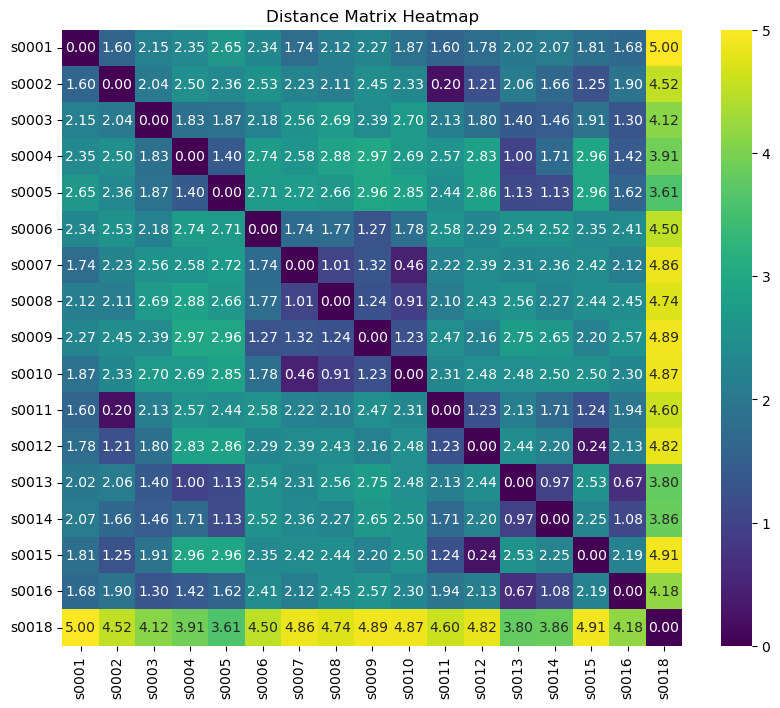

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix_df, annot=True, cmap='viridis', fmt=".2f")
plt.title("Distance Matrix Heatmap")
plt.show()

## clustered version

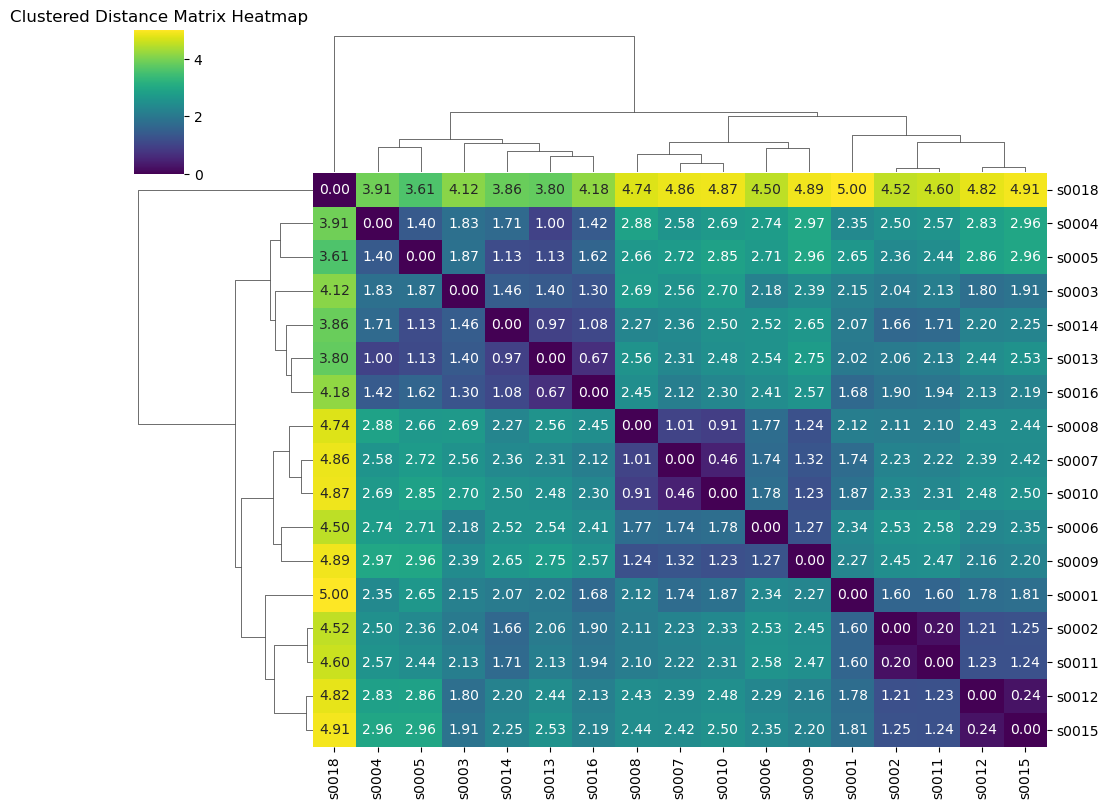

In [21]:
sns.clustermap(dist_matrix_df, cmap="viridis", figsize=(10, 8), annot=True, fmt=".2f")

plt.title("Clustered Distance Matrix Heatmap")
plt.show()

## clustered rescaled metrics

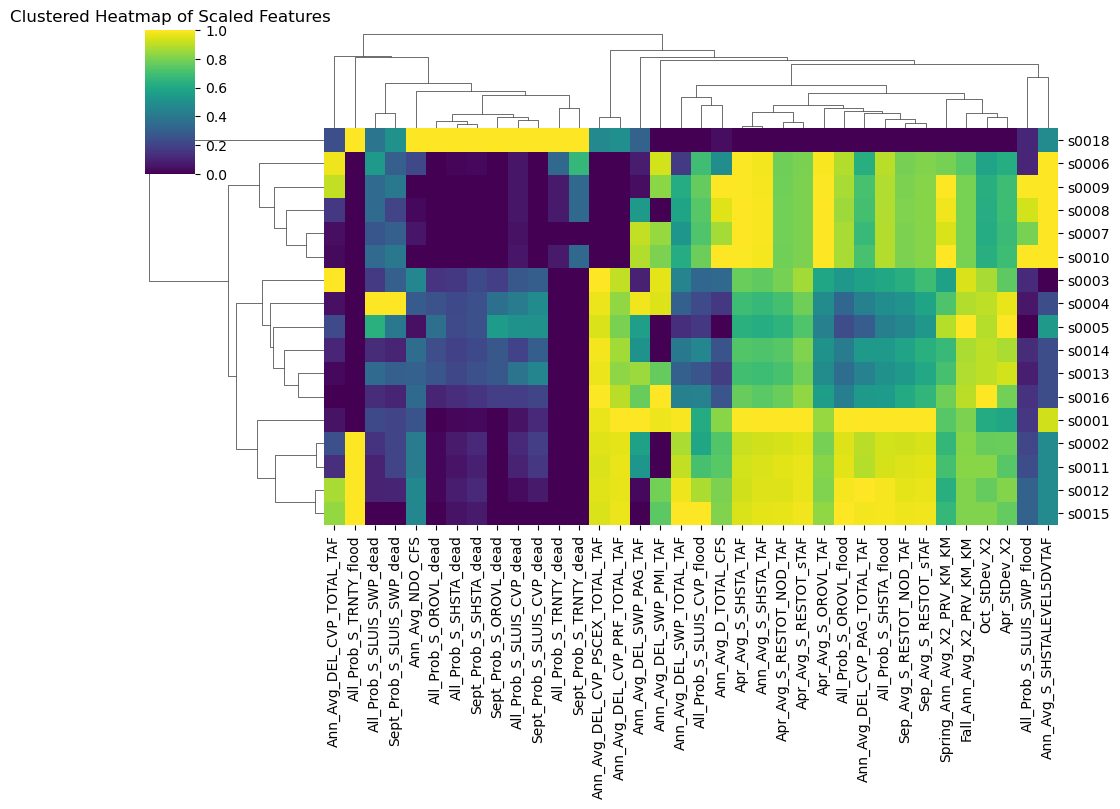

In [22]:
sns.clustermap(combined_df_noflow_scaled, cmap="viridis", figsize=(10, 8), standard_scale=1)

plt.title("Clustered Heatmap of Scaled Features")
plt.show()